In [137]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random

class hopfield(object):

  def __init__(self,x):
    self.x = x
    self.w = self.x.dot(self.x.T) - self.x.shape[1]*np.eye(self.x.shape[0])

  def predict(self,x):
    self.a = self.w.dot(x)
    self.a_n=np.ones(self.a.shape)
    self.l=0
    for i in range(1000):
      self.a_n = np.sign(self.w.dot(self.a))
      if np.all(self.a_n==self.a):
        break
      for i in range(self.a.shape[0]):
        c = np.ones(self.a.shape)
        c=self.a
        if self.a[i]==self.a_n[i] :
          pass
        else:
          self.l=self.l+1
          c[i]=self.a_n[i]
          self.a_n=c
          break
      self.a =self.a_n
    return self.a_n

def hopimage (x):
  img = Image.open(x).resize((100,100)).convert('L')
  img_arr = np.array(img)
  one_dim = np.reshape(img_arr,(100*100))[:,np.newaxis]
  k=np.array(one_dim)
  for i in range(one_dim.shape[0]):
    if k[i] >127 :
      one_dim[i] = 1
    else:
      one_dim[i] =-1
  return one_dim


def noisyimg (x,k) :
  a = hopimage(x)
  b=np.array(a)
  i=int((k/100)*10000)
  for _ in range(i):
    rand=random.randint(0,9999)
    if b[rand] == 1 :
      a[rand] = -1
    else:
      a[rand] = 1
  return a

def hopimgshow (x):
  x1 = np.reshape(x,(100,100))
  plt.figure()
  plt.imshow(x1)
  plt.show()




x=np.array([[1,1,1,1],[1,-1,-1,1]]).T
hop = hopfield(x)
print(hop.w)
x1=np.array([[1,-1,1,1]]).T
print(hop.predict(x1))
print(hop.l)




[[0. 0. 0. 2.]
 [0. 0. 2. 0.]
 [0. 2. 0. 0.]
 [2. 0. 0. 0.]]
[[ 1.]
 [-1.]
 [-1.]
 [ 1.]]
4


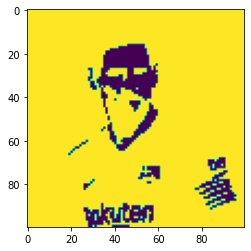

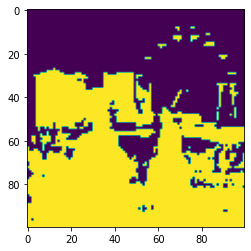

(10000, 2)


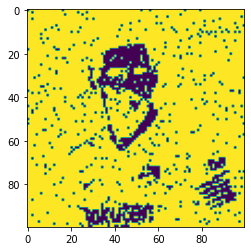

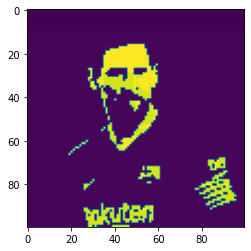

In [138]:
img1 = hopimage('download.jpg')
img2 = hopimage('dorsa.jpg')
hopimgshow(img1)
hopimgshow(img2)
X = np.concatenate((img1,img2),axis=1)
print(X.shape)
hop = hopfield(X)
noisy = noisyimg('download.jpg',5)
hopimgshow(noisy)
y=hop.predict(noisy)
hopimgshow(y)




In [139]:
x=np.array([[1,1,1,1],[1,-1,-1,1]]).T
hop = hopfield(x)
print(hop.w)
x1=np.array([[1,1,-1,1]]).T
print(hop.predict(x1))
print(hop.l)


[[0. 0. 0. 2.]
 [0. 0. 2. 0.]
 [0. 2. 0. 0.]
 [2. 0. 0. 0.]]
[[1.]
 [1.]
 [1.]
 [1.]]
4
